# Représentation temps-fréquence

In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('../signal.mplstyle')
mpl.rcParams['font.size'] = 16

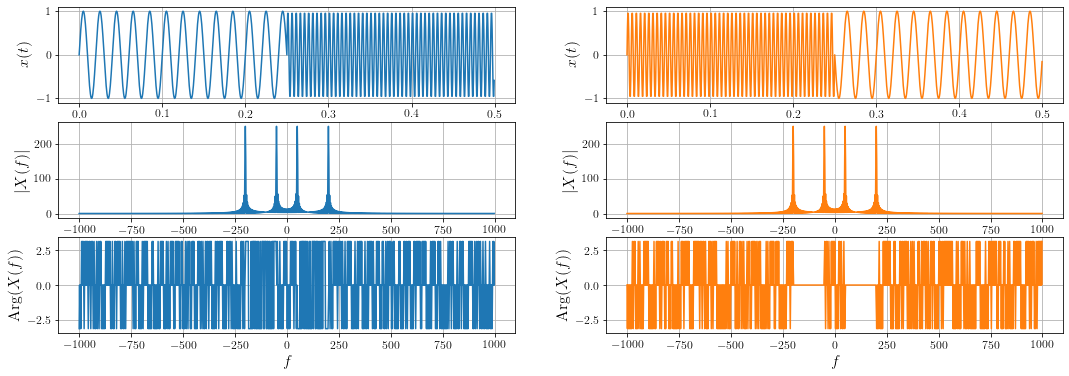

In [2]:
N = 1000
n = np.arange(N)
fe = 2e3
Te = 1/fe
t = n*Te
k = np.arange(N) - N/2
f = k*fe/N
f1, f2 = 50, 200

# Signaux
signals = [
    np.where( n<N/2, np.sin(2*np.pi*f1*t), np.sin(2*np.pi*f2*t) ),
    np.where( n<N/2, np.sin(2*np.pi*f2*t), np.sin(2*np.pi*f1*t) )
]
colors = [ "tab:blue", "tab:orange" ]

i = 0
fig = plt.figure(figsize=(18,6))
for x in signals:
    
    i += 1
    
    # Transformée de Fourier (partie positive seulement)
    X = fft.fftshift(fft.fft(x))
    
    # Affichage
    plt.subplot(3,2,i)
    plt.plot(t, x, colors[i-1])
    plt.xlabel("$t$")
    plt.ylabel("$x(t)$")
    plt.subplot(3,2,2+i)
    plt.plot(f, np.abs(X), colors[i-1])
    plt.xlabel("$f$")
    plt.ylabel("$|X(f)|$")
    plt.subplot(3,2,4+i)
    plt.plot(f, np.angle(X), colors[i-1])
    plt.xlabel("$f$")
    plt.ylabel("$\mathrm{Arg}(X(f))$")
    
plt.savefig('deux-sinus.svg')

/tmp/ipykernel_398549/3488770753.py:85: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fe, x = wavfile.read("aeiou.wav")
/tmp/ipykernel_398549/3488770753.py:90: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fe, x = wavfile.read("vincent-camille.wav")
/tmp/ipykernel_398549/3488770753.py:94: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fe, x = wavfile.read("Elise8000.wav")


(30619,)


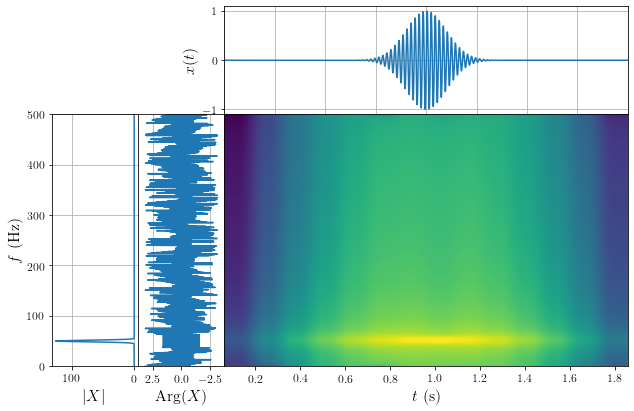

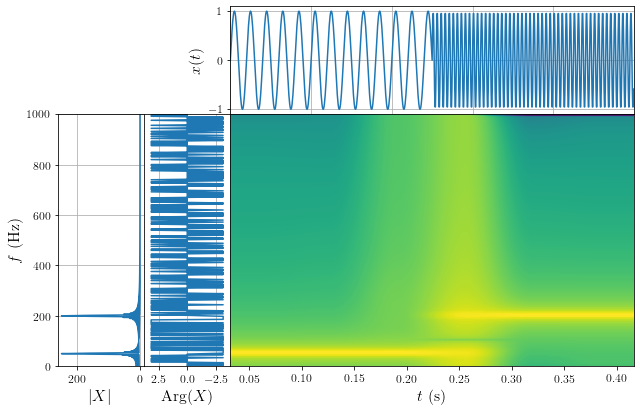

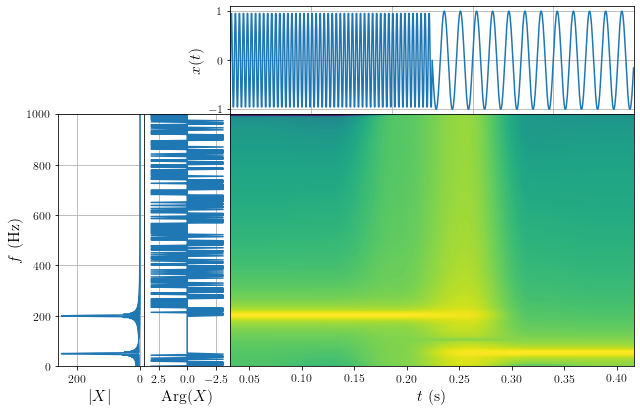

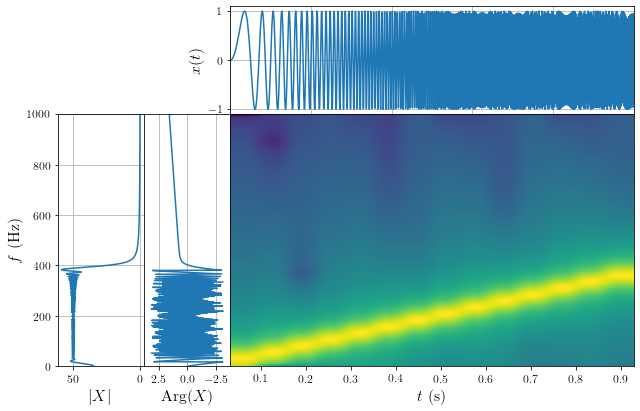

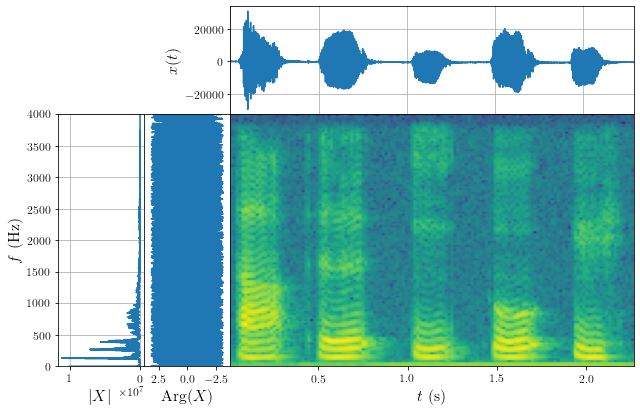

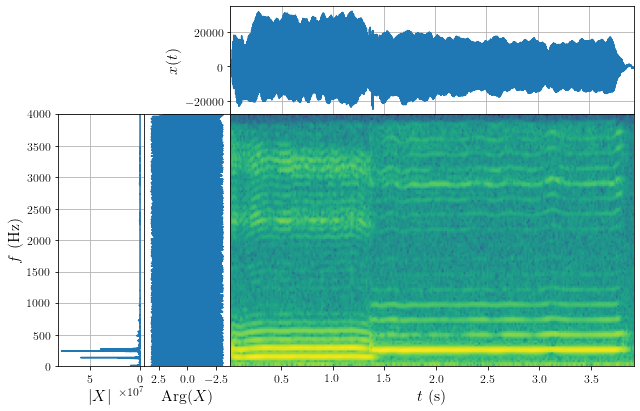

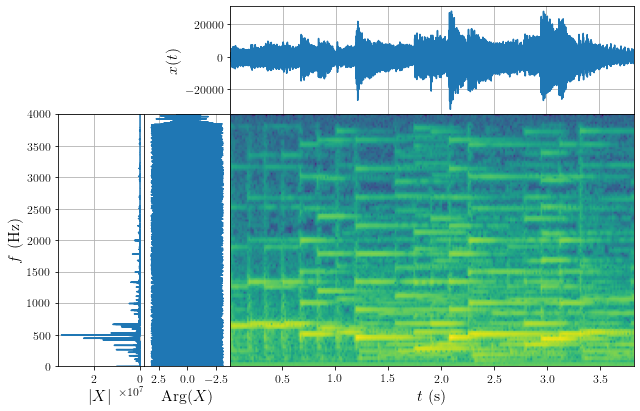

In [3]:
from scipy.io import wavfile
from IPython.display import Audio, Markdown, display

def tfplot(x, fe, name):
    
    # Variables communes
    N = len(x)
    n = np.arange(N)
    Te = 1/fe
    t = n*Te
    k = np.arange(N/2)
    f = k*fe/N
    
    # Transformée de Fourier
    X = fft.fftshift(fft.fft(x))
    X = X[int(N/2):]

    # Affichage
    fig = plt.figure(figsize=(8,5))

    # Signal temporel
    ax1 = plt.subplot(2,3,3)
    ax1.set_position([0.3, 0.7, 0.7, 0.3])
    plt.plot(t, x)
    plt.xlim([t[0], t[-1]])
    plt.ylabel("$x(t)$", fontsize=16)
    
    # Module de la FFT
    ax2 = plt.subplot(2,3,4)
    ax2.set_position([0, 0, 0.15, 0.7])
    plt.plot(np.abs(X), f)
    plt.ylim([0, fe/2])
    ax2.set_xlim(ax2.get_xlim()[::-1])#1.2e3, 0)
    plt.xlabel("$|X|$", fontsize=16)
    plt.ylabel("$f$ (Hz)", fontsize=16)

    # Argument de la FFT
    ax3 = plt.subplot(2,3,5)
    ax3.set_position([0.15, 0, 0.15, 0.7])
    plt.plot(np.angle(X), f)
    plt.ylim([0, fe/2])
    plt.yticks([])
    ax3.set_xlim(np.pi*1.2, -np.pi*1.2)
    plt.xlabel("$\mathrm{Arg}(X)$", fontsize=16)

    # Spectogramme
    ax4 = plt.subplot(2,3,6)
    ax4.set_position([0.3, 0, 0.7, 0.7])
    Pxx, freqs, bins, im = plt.specgram(x, NFFT=256, Fs=fe, noverlap=128, cmap="viridis", scale="dB")
    plt.yticks([])
    plt.grid(False)
    plt.xlabel("$t$ (s)", fontsize=16)
    
    plt.savefig(f'tf-{name}.svg')
    
    
N = 2000
n = np.arange(N)
fe = 1e3
Te = 1/fe
t = n*Te;

# Gaussienne
x = np.exp(-(n-N/2)**2/2/10000) * np.sin(2*np.pi*50*t)
tfplot(x, fe, "gaussienne")
        
# Sinus 50-200
fe = 2e3
x = signals[0]
tfplot(x, fe, "sin50200")
            
# Sinus 200-50
fe = 2e3
x = signals[1]
tfplot(x, fe, "sin20050")

# Chirp
f0 = 0
f1 = 100
k = (f1-f0)/t[-1]
x = np.sin( 2*np.pi*f0*t + 2*np.pi*k*t**2 )
tfplot(x, fe, "chirp")

# Voyelles
fe, x = wavfile.read("aeiou.wav")
x = x[:,1]
tfplot(x, fe, "aeiou")

# Homme/Femme
fe, x = wavfile.read("vincent-camille.wav")
tfplot(x, fe, "homme-femme")

# Lettre à Elise
fe, x = wavfile.read("Elise8000.wav")
print(x.shape)
# x = x[:1e5]
tfplot(x, fe, "elise")

## Découpage temps-fréquence

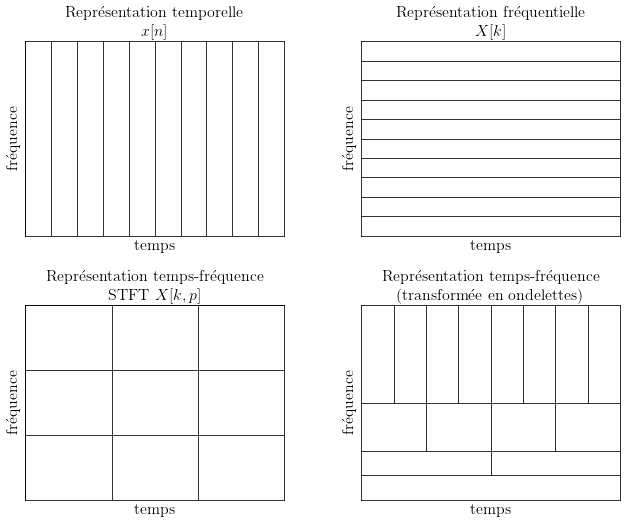

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout(pad=3.0)
axs = axs.ravel()

for i in range(4):
    axs[i].grid(False)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel('temps')
    axs[i].set_ylabel('fréquence')
    
axs[0].set_title('Représentation temporelle\n$x[n]$', fontsize=16)
for t in np.arange(0, 1, .1):
    axs[0].axvline(t, linewidth=.8, color='k')
    
axs[1].set_title('Représentation fréquentielle\n$X[k]$', fontsize=16)
for f in np.arange(0, 1, .1):
    axs[1].axhline(f, linewidth=.8, color='k')
    
axs[2].set_title('Représentation temps-fréquence\nSTFT $X[k,p]$', fontsize=16)
for t in np.arange(0, 1, .3333):
    axs[2].axvline(t, linewidth=.8, color='k')
for f in np.arange(0, 1, .3333):
    axs[2].axhline(f, linewidth=.8, color='k')
    
axs[3].set_title('Représentation temps-fréquence\n(transformée en ondelettes)', fontsize=16)
for f in [.125, .25, .5]:
    axs[3].axhline(f, linewidth=.8, color='k')
for t in [.5]:
    axs[3].plot([t, t], [.125, .25], linewidth=.8, color='k')
for t in np.arange(.25, 1, .25):
    axs[3].plot([t, t], [.25, .5], linewidth=.8, color='k')
for t in np.arange(.125, 1, .125):
    axs[3].plot([t, t], [.5, 1], linewidth=.8, color='k')
axs[3].set_xlim([0, 1])
axs[3].set_ylim([0, 1])
    
plt.savefig('temps-frequence.svg')
plt.show()